<h1 align="center">Emotion prediction using Long Short Term Memory</h1>

<table align="center" style="width:100%">
  <tr>
    <td >Name of the student:</td>
    <td>Adithya Subramani R</td>
  </tr>
  <tr>
    <td>Roll number:</td>
    <td>2020506006</td>
  </tr>
  <tr>
    <td>Subject code and name: </td>
    <td>IT5039- Deep Learning</td>
  </tr>
  <tr>
    <td>Assignment#: </td>
    <td>02</td>
  </tr>
</table> 

# <b>Aim</b>:
To understand the working of Long SHort Term Memory architecture and to perform emotion prediction using LSTM.

# <b>RNN - Major Issue [Vanishing gradient]</b>
- RNN is a type of supervised deep learning algorithm. Here, the neurons are connected to themselves through time. The idea behind RNN is to remember what information was there in the previous neurons so that these neurons could pass information to themselves in the future for further analysis. It means that the information from a specific time instance (t1) is used as an input for the next time instance(t2). This is the idea behind RNN



# <b>LSTM [ Long Short Term Memory ]</b>
- LSTM is an updated version of Recurrent Neural Network to overcome the vanishing gradient problem.
- LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn!

<img src ="https://editor.analyticsvidhya.com/uploads/41131ss%20(2).jpg">

- It has a memory cell at the top which helps to carry the information from a particular time instance to the next time instance in an efficient manner. So, it can able to remember a lot of information from previous states when compared to RNN and overcomes the vanishing gradient problem. Information might be added or removed from the memory cell with the help of valves.

- LSTM network is fed by input data from the current time instance and output of hidden layer from the previous time instance. These two data passes through various activation functions and valves in the network before reaching the output.

In [ ]:
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Activation, Conv1D, MaxPooling1D

# Reading Dataset

- 3 different datasets are considered
    -   Train.txt - The model sees and learns from this data.
    -   Val.txt - provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters.
    -   Test.txt -  provide an unbiased evaluation of a final model fit on the training dataset.

<img src="https://labelyourdata.com/img/article-illustrations/splitting-data-set.png" width = "700">

<img width="450" src="https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/61568656a13218cdde7f6166_training-data-validation-test.png">

In [ ]:
df_train = pd.read_csv('../dataset/train.txt', names=['Text', 'Emotion'], sep=';')
df_test = pd.read_csv('../dataset/test.txt', names=['Text', 'Emotion'], sep=';')
df_val = pd.read_csv('../dataset/val.txt', names=['Text', 'Emotion'], sep=';')

In [ ]:
df_train.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


# Pre-Processing of Dataset

In [ ]:
# Text preprocessing function

str_punc = string.punctuation.replace(',', '').replace("'",'')

def clean(text):
    global str_punc
    text = re.sub(r'[^a-zA-Z ]', '', text)
    text = text.lower()
    return text    

In [ ]:
df_test = df_test[df_test['Emotion'].isin(['sadness','anger','joy','fear'])]
df_val = df_val[df_val['Emotion'].isin(['sadness','anger','joy','fear'])]
df_train = df_train[df_train['Emotion'].isin(['sadness','anger','joy','fear'])]

X_train = df_train['Text'].apply(clean)
y_train = df_train['Emotion']

X_test = df_test['Text'].apply(clean)
y_test = df_test['Emotion']

X_val = df_val['Text'].apply(clean)
y_val = df_val['Emotion']

In [ ]:
X_train.head()

0                              i didnt feel humiliated
1    i can go from feeling so hopeless to so damned...
2     im grabbing a minute to post i feel greedy wrong
4                                 i am feeling grouchy
5    ive been feeling a little burdened lately wasn...
Name: Text, dtype: object

# Label Encoding

- Label Encoding is a popular encoding technique for handling categorical variables. 
- In this technique, each label is assigned a unique integer based on alphabetical ordering.

In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

In [ ]:
y_train 

array([3, 3, 0, ..., 2, 0, 3])

### Although It is converted to numerical form, but to establish the relationship between labels so that it could be understood by the algorithm, i have to convert it to 2D Matrix form (usually Binary Matrix)
- We use to_categorical to transform our training data before we pass it to your model.
- If training data uses classes as numbers, to_categorical will transform those numbers in proper vectors for using with model

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

# Tokenization
-   Task of splitting a sequence of text into units with semantic meaning. These units are called tokens.
-   The difficulty in tokenization lies on how to get the ideal split so that all the tokens in the text have the correct meaning, and there are no left out tokens.

- <img width="600" src="https://machinelearningknowledge.ai/wp-content/uploads/2021/01/Keras-Tokenizer-Example.png?ezimgfmt=ng:webp/ngcb1">

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(pd.concat([X_train, X_test], axis=0))

print(tokenizer.word_index)

#### we can use **'texts_to_sequences()'** method to assign integers to words in a list of sentence.

In [ ]:
X_train.head()

0                              i didnt feel humiliated
1    i can go from feeling so hopeless to so damned...
2     im grabbing a minute to post i feel greedy wrong
4                                 i am feeling grouchy
5    ive been feeling a little burdened lately wasn...
Name: Text, dtype: object

In [ ]:
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)
sequences_val = tokenizer.texts_to_sequences(X_val)

####  **pad_sequences()** transforms a list of sequences into a 2D Numpy array.

In [ ]:

X_train = pad_sequences(sequences_train, maxlen=256, truncating='pre') # truncating='pre' => remove post padding extra than maxlen
X_test = pad_sequences(sequences_test, maxlen=256, truncating='pre')
X_val = pad_sequences(sequences_val, maxlen=256, truncating='pre')

vocabSize = len(tokenizer.index_word) + 1
print(f"Vocabulary size = {vocabSize}")

Vocabulary size = 14980


In [ ]:
# Embedding
max_features = 20000
maxlen = 100
embedding_size = 128

# Convolution
kernel_size = 5
filters = 64
pool_size = 4

# LSTM
lstm_output_size = 70

In [ ]:
# Embedding Layer
max_features = vocabSize    # number of unique words in the vocabulary
maxlen = X_train.shape[1]   # length of each sequence or padding size
embedding_size = 200    # uses 200 length vectors to represent each word

# Convolution Layer
kernel_size = 5 # Kernel of size 5*5 matrix
filters = 128 # number of convolutional filters to use

#Max Pooling Layer
pool_size = 4 # size of the max pooling area

# LSTM Layer
lstm_output_size = 128

In [ ]:
print('Build model...')

model = Sequential()
model.add(Embedding(vocabSize, embedding_size, input_length=maxlen)) # 1st Layer - Embedding
model.add(Dropout(0.25))                                             # 2nd Layer - Dropout
model.add(Conv1D(filters,                                            # 3rd Layer - Convolution
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=pool_size))                         # 4th Layer - MaxPooling
model.add(LSTM(lstm_output_size))                                    # 5th Layer - LSTM     
model.add(Dense(4))                                                  # 6th Layer - Dense
model.add(Activation('softmax'))                                     # 7th Layer - Activation    

model.summary()

Build model...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 200)          2996000   
                                                                 
 dropout (Dropout)           (None, 256, 200)          0         
                                                                 
 conv1d (Conv1D)             (None, 252, 128)          128128    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 63, 128)          0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 4)                 516       
                                         

In [ ]:
adam = Adam(learning_rate=0.005)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


In [ ]:
callback = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True,
)

### Fitting the Model with Epochs = 30 , Batch size of 256

In [ ]:
# Fit model
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    verbose=1,
                    batch_size=256,
                    epochs=30,
                    callbacks=[callback]
                   )

Epoch 1/30
56/56 [==============================] - 99s 2s/step - loss: 0.8605 - accuracy: 0.6239 - val_loss: 0.4181 - val_accuracy: 0.8242
Epoch 2/30
56/56 [==============================] - 97s 2s/step - loss: 0.2165 - accuracy: 0.9275 - val_loss: 0.2075 - val_accuracy: 0.9265
Epoch 3/30
56/56 [==============================] - 97s 2s/step - loss: 0.0721 - accuracy: 0.9757 - val_loss: 0.1975 - val_accuracy: 0.9368
Epoch 4/30
56/56 [==============================] - 97s 2s/step - loss: 0.0336 - accuracy: 0.9889 - val_loss: 0.1786 - val_accuracy: 0.9414
Epoch 5/30
56/56 [==============================] - 97s 2s/step - loss: 0.0191 - accuracy: 0.9928 - val_loss: 0.2276 - val_accuracy: 0.9374
Epoch 6/30
56/56 [==============================] - 96s 2s/step - loss: 0.0132 - accuracy: 0.9955 - val_loss: 0.2133 - val_accuracy: 0.9431
Epoch 7/30
56/56 [==============================] - 94s 2s/step - loss: 0.0162 - accuracy: 0.9945 - val_loss: 0.2235 - val_accuracy: 0.9454


# Final evaluation of the model


In [ ]:
scores = model.evaluate(X_test, y_test, verbose=1) 
print("Final Accuracy : %.2f%%" %(scores[1]*100))
print("Final Loss : %.2f%%" % (scores[0]*100))

56/56 [==============================] - 3s 50ms/step - loss: 0.1751 - accuracy: 0.9515
Final Accuracy : 95.15%
Final Loss : 17.51%


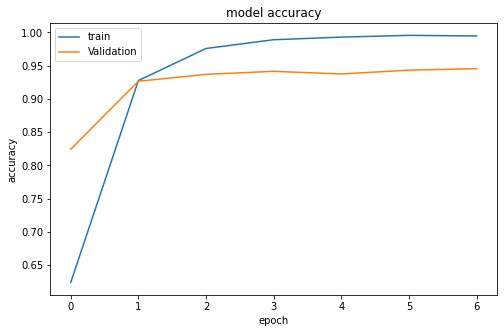

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

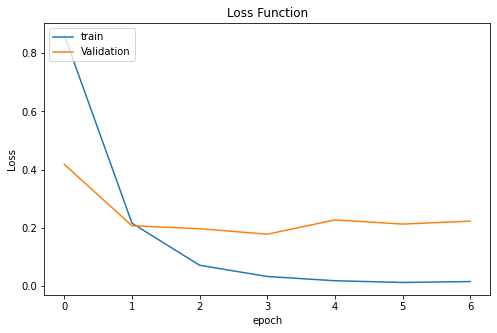

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Function')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# Classify custom sample
def predict(sentence,modelxx):
    sentence = clean(sentence)
    sentence = tokenizer.texts_to_sequences([sentence])
    sentence = pad_sequences(sentence, maxlen=256, truncating='pre')
    result = le.inverse_transform(np.argmax(modelxx.predict(sentence), axis=-1))[0]
    proba =  np.max(modelxx.predict(sentence))
    print(f"{result} : {proba}\n\n")

In [ ]:
predict('i feel humiliated')

i feel humiliated
1/1 [==============================] - 0s 30ms/step
sadness : 0.9996845722198486




# <b>Result</b>:
Hence the working of LSTM was understood and a model was successfully created to predict emotions based on text.